# Payment Day Prediction (MACHINE LEARNING): SACHIN H2HBABBA2165

Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('nandal.csv')  #Reading the given csv data file

In [3]:
data.shape #checking the shape of the data

(50000, 19)

# PIPELINE  (Pre_processing->Splitting->EDA->Feature engg.->Selection           ->Modelling->Prediction)
1.Understanding the problem                                                                                                     
2.Data Reading                                                                                                                 
3.Filtering on whole Data                                                                                                       
4.Removing the datapoints where the target value is null(real_test)                                                             
5.Preprocess the data                                                                                                           
6.Train,validation and test split                                                                                               
7.EDA                                                                                                                           
8.Feature Engineering                                                                                                           
9.Feture Selection                                                                                                             
10.Modelling                                                                                                                   
11.Payment day prediction on real_test                                                                                         

In [4]:
data.head() #checking the first five rows of data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200466603,SMITH'S llc,2019-01-28 00:00:00,2019.0,1.928606e+09,2019-01-11,20190110,20190111,20190126.0,USD,RV,1.0,NaN,47014.98,20190111.0,NAA8,1.928606e+09,0
1,U001,0200779051,AFFILI associates,2019-01-23 00:00:00,2019.0,1.928599e+09,2019-01-09,20190110,20190109,20190124.0,USD,RV,1.0,NaN,120017.47,20190109.0,NAA8,1.928599e+09,0
2,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930676e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,16497.30,20200321.0,NAH4,1.930676e+09,1
3,U001,0200769623,WAL-MAR corporation,2019-01-16 00:00:00,2019.0,1.928567e+09,2019-01-05,20190104,20190105,20190120.0,USD,RV,1.0,NaN,13478.29,20190105.0,NAH4,1.928567e+09,0
4,U001,0200759878,SA foundation,2020-02-03 00:00:00,2020.0,1.930396e+09,2020-01-17,20200114,20200117,20200201.0,USD,RV,1.0,NaN,19474.56,20200117.0,NAH4,1.930396e+09,0


In [5]:
data.tail() #checking the last 5 rows of data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200762301,C&S WH systems,2019-02-01 00:00:00,2019.0,1.928637e+09,2019-01-17,20190117,20190117,20190201.0,USD,RV,1.0,NaN,2112.63,20190117.0,NAC6,1.928637e+09,0
49996,U001,0200759878,SA corporation,2019-11-26 00:00:00,2019.0,1.930133e+09,2019-11-10,20191109,20191110,20191125.0,USD,RV,1.0,NaN,98621.05,20191110.0,NAH4,1.930133e+09,0
49997,U001,0200418007,AM systems,2019-05-01 00:00:00,2019.0,1.929158e+09,2019-04-16,20190417,20190416,20190620.0,USD,RV,1.0,NaN,888.84,20190416.0,NAGD,1.929158e+09,0
49998,U001,0200769623,WAL-MAR systems,2019-07-12 00:00:00,2019.0,1.929559e+09,2019-06-29,20190629,20190629,20190714.0,USD,RV,1.0,NaN,65217.16,20190629.0,NAH4,1.929559e+09,0
49999,CA02,0140104429,COSTCO corporation,2019-03-13 00:00:00,2019.0,2.960530e+09,2019-02-19,20190219,20190219,20190309.0,CAD,RV,1.0,NaN,13915.52,20190227.0,CA10,2.960530e+09,0


# Filtering on whole Data

In [6]:
data.isnull().sum() #checking the NULL values in data

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [7]:
data.info()                   #Checking the info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [8]:
vs_constant = VarianceThreshold(threshold=0)                 #Checking for the constant feature using Variance threshold

In [9]:
numerical = data[data.select_dtypes([np.number]).columns]    #Only taking numerical column for variance threshold

In [10]:
vs_constant.fit(numerical)                                   # fitting the numerical columns


VarianceThreshold(threshold=0)

In [11]:
constant_columns = [column for column in numerical.columns                                   #for constant column
                    if column not in numerical.columns[vs_constant.get_support()]]


In [12]:
data.shape

(50000, 19)

In [13]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200466603,SMITH'S llc,2019-01-28 00:00:00,2019.0,1.928606e+09,2019-01-11,20190110,20190111,20190126.0,USD,RV,1.0,NaN,47014.98,20190111.0,NAA8,1.928606e+09,0
1,U001,0200779051,AFFILI associates,2019-01-23 00:00:00,2019.0,1.928599e+09,2019-01-09,20190110,20190109,20190124.0,USD,RV,1.0,NaN,120017.47,20190109.0,NAA8,1.928599e+09,0
2,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930676e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,16497.30,20200321.0,NAH4,1.930676e+09,1
3,U001,0200769623,WAL-MAR corporation,2019-01-16 00:00:00,2019.0,1.928567e+09,2019-01-05,20190104,20190105,20190120.0,USD,RV,1.0,NaN,13478.29,20190105.0,NAH4,1.928567e+09,0
4,U001,0200759878,SA foundation,2020-02-03 00:00:00,2020.0,1.930396e+09,2020-01-17,20200114,20200117,20200201.0,USD,RV,1.0,NaN,19474.56,20200117.0,NAH4,1.930396e+09,0


In [14]:
data.drop(labels=constant_columns, axis=1, inplace=True)   #dropping all constant features

In [15]:
data.shape    #we have dropped 2 constant columns

(50000, 17)

In [16]:
# make a threshold for quasi constant.
threshold = 0.98

# create empty list
quasi_constant_feature = []

In [17]:
for feature in data.columns:

    # calculate the ratio.
    predominant = (data[feature].value_counts() / np.float(len(data))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

['document type']


In [18]:
data.drop(labels=quasi_constant_feature, axis=1, inplace=True)  #dropping quasi_constant feature

In [19]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Changing the datetime columns in their correct format

In [20]:
data['document_create_date.1']=pd.to_datetime(data['document_create_date.1'],format='%Y%m%d')
data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d')
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')
data['clear_date']=pd.to_datetime(data['clear_date'])

In [21]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

Dropping document_create_date : Because we have similar other column document_create_date.1

In [22]:
data=data.drop(['document_create_date'],axis=1)  

## Removing the datapoints where the target value is null(real_test)

In [23]:
split_data=data['clear_date'].notnull()  #spliting data in two parts to add NULL values from clear_date into real_test
d2165=data[split_data]         #making a dataet with no null values : d2165
real_test=data[~split_data]    #making the dataset that contains NULL values : real_test
d2165.shape,real_test.shape    #checking the shape of the data

((40000, 15), (10000, 15))

## Preprocessing the data

In [24]:
[col for col in d2165.columns if d2165[col].isnull().sum() > 0]  #Checking if there any NULL values 

['invoice_id']

In [25]:
d_meadian=d2165['invoice_id']
d2165=d2165.fillna(d_meadian.median())     #Replacing the null values with the median of the column
d2165.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

## Deriving the target column as delay_days from due_date and clear_date

In [26]:
a=d2165['clear_date']
b=d2165['due_in_date']
d2165['delay_days']=(b-a).dt.days
d2165['delay_days']

0        -2
1         1
3         4
4        -2
5         8
         ..
49995     0
49996    -1
49997    50
49998     2
49999    -4
Name: delay_days, Length: 40000, dtype: int64

In [27]:
d2165.shape

(40000, 16)

In [28]:
d2165.drop_duplicates(keep=False,inplace=True)
d2165.shape #After dropping duplicates values

(38319, 16)

In [29]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200466603,SMITH'S llc,2019-01-28,2019.0,1.928606e+09,2019-01-11,2019-01-11,2019-01-26,USD,47014.98,2019-01-11,NAA8,1.928606e+09,0
1,U001,0200779051,AFFILI associates,2019-01-23,2019.0,1.928599e+09,2019-01-09,2019-01-09,2019-01-24,USD,120017.47,2019-01-09,NAA8,1.928599e+09,0
2,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930676e+09,2020-03-21,2020-03-21,2020-04-05,USD,16497.30,2020-03-21,NAH4,1.930676e+09,1
3,U001,0200769623,WAL-MAR corporation,2019-01-16,2019.0,1.928567e+09,2019-01-05,2019-01-05,2019-01-20,USD,13478.29,2019-01-05,NAH4,1.928567e+09,0
4,U001,0200759878,SA foundation,2020-02-03,2020.0,1.930396e+09,2020-01-17,2020-01-17,2020-02-01,USD,19474.56,2020-01-17,NAH4,1.930396e+09,0


In [30]:
d2165=d2165.drop(['isOpen','buisness_year'],axis=1) #dropping isOpen and buisness_year column 

In [31]:
d2165.shape

(38319, 14)

In [32]:
d2165 = d2165.sort_values(by="posting_date",ignore_index=True)  #Sorting the data in ascending order based on the posting Date column. 

# Splitting the data into train(70%),validation(15%) and test(15%) set

In [33]:
X=d2165.drop(['delay_days'],axis=1)
Y=d2165['delay_days']

x_train,X_test,y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0,shuffle=False)
x_val,x_test,y_val,y_test=train_test_split(X_test,Y_test,test_size=0.5,random_state=0.5,shuffle=False)


In [34]:
x_train.shape,x_val.shape,x_test.shape #checking the shape of the dataset

((26823, 13), (5748, 13), (5748, 13))

In [35]:
y_train.shape,y_val.shape,y_test.shape

((26823,), (5748,), (5748,))

# EDA

<AxesSubplot:xlabel='delay_days', ylabel='Density'>

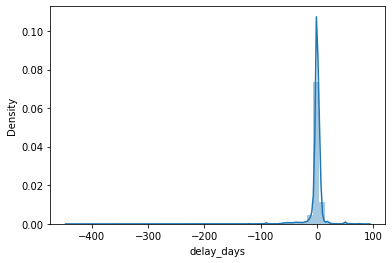

In [36]:
sns.distplot(y_train)       #plot the graph of delay_days to see distribution

In [37]:
#y_train=pd.Series(y_train)

In [38]:
x_train.merge(y_train,on = x_train.index) #checking the data with merging the y_train also

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay_days
0,0,U001,0200769623,WAL-MAR in,2019-01-15,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,14139.49,2018-12-30,NAH4,1.928539e+09,-1
1,1,U001,0200769623,WAL-MAR trust,2019-01-09,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,985.41,2018-12-30,NAH4,1.928537e+09,5
2,2,U001,0200726979,BJ'S systems,2019-01-15,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,63.46,2018-12-30,NAA8,1.928537e+09,-1
3,3,U001,0200769623,WAL-MAR co,2019-01-09,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,28485.61,2018-12-30,NAH4,1.928542e+09,5
4,4,U001,0200769623,WAL-MAR in,2019-01-09,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,3840.51,2018-12-30,NAH4,1.928541e+09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26818,26818,U001,0200794332,COST trust,2019-10-23,1.929989e+09,2019-10-09,2019-10-09,2019-10-24,USD,1878.24,2019-10-09,NAAX,1.929989e+09,1
26819,26819,U001,0200707822,PUBLI associates,2019-11-18,1.929990e+09,2019-10-09,2019-10-09,2019-11-18,USD,11649.87,2019-10-09,NAWU,1.929990e+09,0
26820,26820,U001,0200713007,KEEFE associates,2019-10-18,1.929976e+09,2019-10-09,2019-10-09,2019-10-24,USD,14529.68,2019-10-09,NAA8,1.929976e+09,6
26821,26821,U001,0200782001,GORDO systems,2019-10-22,1.929991e+09,2019-10-09,2019-10-09,2019-10-24,USD,21489.00,2019-10-09,NAA8,1.929991e+09,2


<AxesSubplot:xlabel='delay_days', ylabel='total_open_amount'>

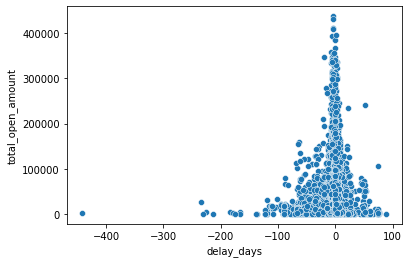

In [40]:
d=x_train.merge(y_train,on = x_train.index)
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay_days", y="total_open_amount")
# Scatterplot graph between delay_days and total_open_amount

In [42]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26823 entries, 0 to 26822
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           26823 non-null  object        
 1   cust_number             26823 non-null  object        
 2   name_customer           26823 non-null  object        
 3   clear_date              26823 non-null  datetime64[ns]
 4   doc_id                  26823 non-null  float64       
 5   posting_date            26823 non-null  object        
 6   document_create_date.1  26823 non-null  datetime64[ns]
 7   due_in_date             26823 non-null  datetime64[ns]
 8   invoice_currency        26823 non-null  object        
 9   total_open_amount       26823 non-null  float64       
 10  baseline_create_date    26823 non-null  datetime64[ns]
 11  cust_payment_terms      26823 non-null  object        
 12  invoice_id              26823 non-null  float6

In [43]:
x_train.corr()  #checking the correlation in train_set

,doc_id,total_open_amount,invoice_id
doc_id,1.000000,0.188032,0.962071
total_open_amount,0.188032,1.000000,0.197182
invoice_id,0.962071,0.197182,1.000000


In [44]:
d.corr()     #checking the correlation with delay_days also

,key_0,doc_id,total_open_amount,invoice_id,delay_days
key_0,1.000000,0.018202,0.010963,0.020877,0.021397
doc_id,0.018202,1.000000,0.188032,0.962071,-0.143905
total_open_amount,0.010963,0.188032,1.000000,0.197182,0.005158
invoice_id,0.020877,0.962071,0.197182,1.000000,-0.133603
delay_days,0.021397,-0.143905,0.005158,-0.133603,1.000000


In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26823 entries, 0 to 26822
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           26823 non-null  object        
 1   cust_number             26823 non-null  object        
 2   name_customer           26823 non-null  object        
 3   clear_date              26823 non-null  datetime64[ns]
 4   doc_id                  26823 non-null  float64       
 5   posting_date            26823 non-null  object        
 6   document_create_date.1  26823 non-null  datetime64[ns]
 7   due_in_date             26823 non-null  datetime64[ns]
 8   invoice_currency        26823 non-null  object        
 9   total_open_amount       26823 non-null  float64       
 10  baseline_create_date    26823 non-null  datetime64[ns]
 11  cust_payment_terms      26823 non-null  object        
 12  invoice_id              26823 non-null  float6

In [46]:
x_train['business_code'].value_counts()  #counting the values no. of differnt values in train set

U001    24149
CA02     2200
U013      368
U002       96
U005        8
U007        2
Name: business_code, dtype: int64

In [47]:
# clubbing business_code with low occurance in dataset - to ensure model gets max information
x_train['business_code'] = np.where(x_train['business_code'].isin(["U002",
                                                             "U005",
                                                             "U007"]),"U013",x_train['business_code'])

In [48]:
#change reflecting in val and test also
x_val['business_code'] = np.where(x_val['business_code'].isin(["U002",
                                                             "U005",
                                                             "U007"]),"U013",x_val['business_code'])

In [49]:
x_test['business_code'] = np.where(x_test['business_code'].isin(["U002",
                                                             "U005",
                                                             "U007"]),"U013",x_test['business_code'])

In [50]:
x_train['business_code'].value_counts()  #checking the changes

U001    24149
CA02     2200
U013      474
Name: business_code, dtype: int64

# Feature Engineering

In [51]:
from sklearn.preprocessing import LabelEncoder          #label encoding on business_code
business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_encoder.transform(x_train['business_code'])

In [52]:
#reflecting changes in val and test
x_val['business_code_enc'] = business_code_encoder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_code_encoder.transform(x_test['business_code'])

In [53]:
# function will delete a column from train , val and test
def drop_3_col(col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [54]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,business_code_enc
0,U001,0200769623,WAL-MAR in,2019-01-15,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,14139.49,2018-12-30,NAH4,1.928539e+09,1
1,U001,0200769623,WAL-MAR trust,2019-01-09,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,985.41,2018-12-30,NAH4,1.928537e+09,1
2,U001,0200726979,BJ'S systems,2019-01-15,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,63.46,2018-12-30,NAA8,1.928537e+09,1
3,U001,0200769623,WAL-MAR co,2019-01-09,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,28485.61,2018-12-30,NAH4,1.928542e+09,1
4,U001,0200769623,WAL-MAR in,2019-01-09,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,3840.51,2018-12-30,NAH4,1.928541e+09,1


In [55]:
x_train ,x_val, x_test = drop_3_col(['business_code'])  #dropping business_code

In [56]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26823 entries, 0 to 26822
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             26823 non-null  object        
 1   name_customer           26823 non-null  object        
 2   clear_date              26823 non-null  datetime64[ns]
 3   doc_id                  26823 non-null  float64       
 4   posting_date            26823 non-null  object        
 5   document_create_date.1  26823 non-null  datetime64[ns]
 6   due_in_date             26823 non-null  datetime64[ns]
 7   invoice_currency        26823 non-null  object        
 8   total_open_amount       26823 non-null  float64       
 9   baseline_create_date    26823 non-null  datetime64[ns]
 10  cust_payment_terms      26823 non-null  object        
 11  invoice_id              26823 non-null  float64       
 12  business_code_enc       26823 non-null  int32 

In [57]:
from sklearn.preprocessing import LabelEncoder        #label encoding on cust_number
encoder = LabelEncoder()
encoder.fit(x_train['cust_number'])
x_train['cust_number_enc'] = encoder.transform(x_train['cust_number'])

In [58]:
#reflecting changes in val and test

x_val['cust_number_enc'] = encoder.fit_transform(x_val['cust_number'])
x_test['cust_number_enc'] = encoder.fit_transform(x_test['cust_number'])

In [59]:
x_train ,x_val, x_test = drop_3_col(['cust_number'])    #dropping cust_number

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26823 entries, 0 to 26822
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           26823 non-null  object        
 1   clear_date              26823 non-null  datetime64[ns]
 2   doc_id                  26823 non-null  float64       
 3   posting_date            26823 non-null  object        
 4   document_create_date.1  26823 non-null  datetime64[ns]
 5   due_in_date             26823 non-null  datetime64[ns]
 6   invoice_currency        26823 non-null  object        
 7   total_open_amount       26823 non-null  float64       
 8   baseline_create_date    26823 non-null  datetime64[ns]
 9   cust_payment_terms      26823 non-null  object        
 10  invoice_id              26823 non-null  float64       
 11  business_code_enc       26823 non-null  int32         
 12  cust_number_enc         26823 non-null  int32 

In [61]:
x_train['name_customer'].nunique()

3257

In [62]:
x_train['name_customer'].value_counts()

WAL-MAR in             616
WAL-MAR                601
WAL-MAR trust          597
WAL-MAR corporation    591
WAL-MAR foundation     589
                      ... 
Y H llc                  1
PAPA systems             1
DAVISCO                  1
FOOD 4 associates        1
WEST P corporation       1
Name: name_customer, Length: 3257, dtype: int64

In [63]:
#label encoding on name_customer
encoder.fit(x_train['name_customer'])
x_train['name_customer_enc'] = encoder.transform(x_train['name_customer'])

In [64]:
#reflecting changes in val and test
x_val['name_customer_enc'] = encoder.fit_transform(x_val['name_customer'])
x_test['name_customer_enc'] = encoder.fit_transform(x_test['name_customer'])

In [65]:
x_train ,x_val, x_test = drop_3_col(['name_customer'])                  #dropping name_customer

In [66]:
encoder = LabelEncoder()                                               #label encoding on cust_payment_terms
encoder.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc'] = encoder.transform(x_train['cust_payment_terms'])

In [67]:
#reflecting changes in val and test
x_val['cust_payment_terms_enc'] = encoder.fit_transform(x_val['cust_payment_terms'])
x_test['cust_payment_terms_enc'] = encoder.fit_transform(x_test['cust_payment_terms'])

In [68]:
x_train ,x_val, x_test = drop_3_col(['cust_payment_terms'])              #dropping cust_payment_terms

In [69]:
y = pd.get_dummies(x_train.invoice_currency, prefix='invoice_currency')   #one hot encoding on invoice_currency
z = pd.get_dummies(x_val.invoice_currency, prefix='invoice_currency')
k = pd.get_dummies(x_test.invoice_currency, prefix='invoice_currency')
k.head()

,invoice_currency_CAD,invoice_currency_USD
32571,0,1
32572,1,0
32573,0,1
32574,0,1
32575,0,1


In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26823 entries, 0 to 26822
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              26823 non-null  datetime64[ns]
 1   doc_id                  26823 non-null  float64       
 2   posting_date            26823 non-null  object        
 3   document_create_date.1  26823 non-null  datetime64[ns]
 4   due_in_date             26823 non-null  datetime64[ns]
 5   invoice_currency        26823 non-null  object        
 6   total_open_amount       26823 non-null  float64       
 7   baseline_create_date    26823 non-null  datetime64[ns]
 8   invoice_id              26823 non-null  float64       
 9   business_code_enc       26823 non-null  int32         
 10  cust_number_enc         26823 non-null  int32         
 11  name_customer_enc       26823 non-null  int32         
 12  cust_payment_terms_enc  26823 non-null  int32 

In [71]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 26823 to 32570
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              5748 non-null   datetime64[ns]
 1   doc_id                  5748 non-null   float64       
 2   posting_date            5748 non-null   object        
 3   document_create_date.1  5748 non-null   datetime64[ns]
 4   due_in_date             5748 non-null   datetime64[ns]
 5   invoice_currency        5748 non-null   object        
 6   total_open_amount       5748 non-null   float64       
 7   baseline_create_date    5748 non-null   datetime64[ns]
 8   invoice_id              5748 non-null   float64       
 9   business_code_enc       5748 non-null   int32         
 10  cust_number_enc         5748 non-null   int32         
 11  name_customer_enc       5748 non-null   int32         
 12  cust_payment_terms_enc  5748 non-null   int

In [72]:
x_train ,x_val, x_test = drop_3_col(['invoice_currency'])                     #dropping invoice_id

In [73]:
x_train=x_train.merge(y,on = x_train.index)
x_val=x_val.merge(z,on = x_val.index)                                     #merging the CAD and USD column in train,test,val
x_test=x_test.merge(k,on = x_test.index)

In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26823 entries, 0 to 26822
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   key_0                   26823 non-null  int64         
 1   clear_date              26823 non-null  datetime64[ns]
 2   doc_id                  26823 non-null  float64       
 3   posting_date            26823 non-null  object        
 4   document_create_date.1  26823 non-null  datetime64[ns]
 5   due_in_date             26823 non-null  datetime64[ns]
 6   total_open_amount       26823 non-null  float64       
 7   baseline_create_date    26823 non-null  datetime64[ns]
 8   invoice_id              26823 non-null  float64       
 9   business_code_enc       26823 non-null  int32         
 10  cust_number_enc         26823 non-null  int32         
 11  name_customer_enc       26823 non-null  int32         
 12  cust_payment_terms_enc  26823 non-null  int32 

In [75]:
x_train['due_day'] = x_train['due_in_date'].dt.day
x_train['due_month'] = x_train['due_in_date'].dt.month


x_val['due_day'] = x_val['due_in_date'].dt.day                  #Extracting the information from due_in_date
x_val['due_month'] = x_val['due_in_date'].dt.month              # day , month



x_test['due_day'] = x_test['due_in_date'].dt.day
x_test['due_month'] = x_test['due_in_date'].dt.month

In [76]:
x_train ,x_val, x_test = drop_3_col(['due_in_date'])             #dropping due_in_date

In [77]:
x_train ,x_val, x_test = drop_3_col(['clear_date'])              #dropping clear_date

In [78]:
x_train[['document_create_date.1','baseline_create_date']]     #checking similarities between two columns

,document_create_date.1,baseline_create_date
0,2018-12-30,2018-12-30
1,2018-12-30,2018-12-30
2,2018-12-30,2018-12-30
3,2018-12-30,2018-12-30
4,2018-12-30,2018-12-30
...,...,...
26818,2019-10-09,2019-10-09
26819,2019-10-09,2019-10-09
26820,2019-10-09,2019-10-09
26821,2019-10-09,2019-10-09


In [79]:
x_train ,x_val, x_test = drop_3_col(['document_create_date.1'])   #dropping document_create_date.1

In [80]:
x_train['posting_date']=pd.to_datetime(x_train['posting_date'])  #converting posting_date in datetime
x_val['posting_date']=pd.to_datetime(x_val['posting_date'])
x_test['posting_date']=pd.to_datetime(x_test['posting_date'])

In [81]:
x_train[['posting_date','baseline_create_date']]                #checking similarities between two columns

,posting_date,baseline_create_date
0,2018-12-30,2018-12-30
1,2018-12-30,2018-12-30
2,2018-12-30,2018-12-30
3,2018-12-30,2018-12-30
4,2018-12-30,2018-12-30
...,...,...
26818,2019-10-09,2019-10-09
26819,2019-10-09,2019-10-09
26820,2019-10-09,2019-10-09
26821,2019-10-09,2019-10-09


In [82]:
x_train ,x_val, x_test = drop_3_col(['baseline_create_date'])   #dropping baseline_create_date

In [83]:
x_train['posting_day'] = x_train['posting_date'].dt.day
x_train['posting_month'] = x_train['posting_date'].dt.month

x_val['posting_day'] = x_val['posting_date'].dt.day                    ##Extracting the information from due_in_date
x_val['posting_month'] = x_val['posting_date'].dt.month                ## day and month

x_test['posting_day'] = x_test['posting_date'].dt.day
x_test['posting_month'] = x_test['posting_date'].dt.month

In [84]:
x_train ,x_val, x_test = drop_3_col(['posting_date'])           #dropping posting_date

In [85]:
x_train.shape ,x_val.shape  ,x_test.shape                  #checking the shape of train ,test and val  (same)

((26823, 9), (5748, 9), (5748, 9))

In [86]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 32571 to 38318
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   doc_id                  5748 non-null   float64
 1   total_open_amount       5748 non-null   float64
 2   invoice_id              5748 non-null   float64
 3   business_code_enc       5748 non-null   int32  
 4   cust_number_enc         5748 non-null   int32  
 5   name_customer_enc       5748 non-null   int32  
 6   cust_payment_terms_enc  5748 non-null   int32  
 7   posting_day             5748 non-null   int64  
 8   posting_month           5748 non-null   int64  
dtypes: float64(3), int32(4), int64(2)
memory usage: 359.2 KB


In [87]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 32571 to 38318
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   doc_id                  5748 non-null   float64
 1   total_open_amount       5748 non-null   float64
 2   invoice_id              5748 non-null   float64
 3   business_code_enc       5748 non-null   int32  
 4   cust_number_enc         5748 non-null   int32  
 5   name_customer_enc       5748 non-null   int32  
 6   cust_payment_terms_enc  5748 non-null   int32  
 7   posting_day             5748 non-null   int64  
 8   posting_month           5748 non-null   int64  
dtypes: float64(3), int32(4), int64(2)
memory usage: 359.2 KB


In [88]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set 
constant_filter.fit(x_train)
#the number of non-constant features.
len(x_train.columns[constant_filter.get_support()])

9

In [89]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]   #checking for the constant_column

print(len(constant_columns))

0


In [90]:
constant_filter = VarianceThreshold(threshold=0.01)   #0.01 threshold for quasi_constant
#we need to simply apply this filter to our training set 
constant_filter.fit(x_train)
#the number of non-constant features.
len(x_train.columns[constant_filter.get_support()])

9

In [91]:
quasi_constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

print(len(quasi_constant_columns))

0


# FEATURE SELECTION

## correlation matrix

<AxesSubplot:>

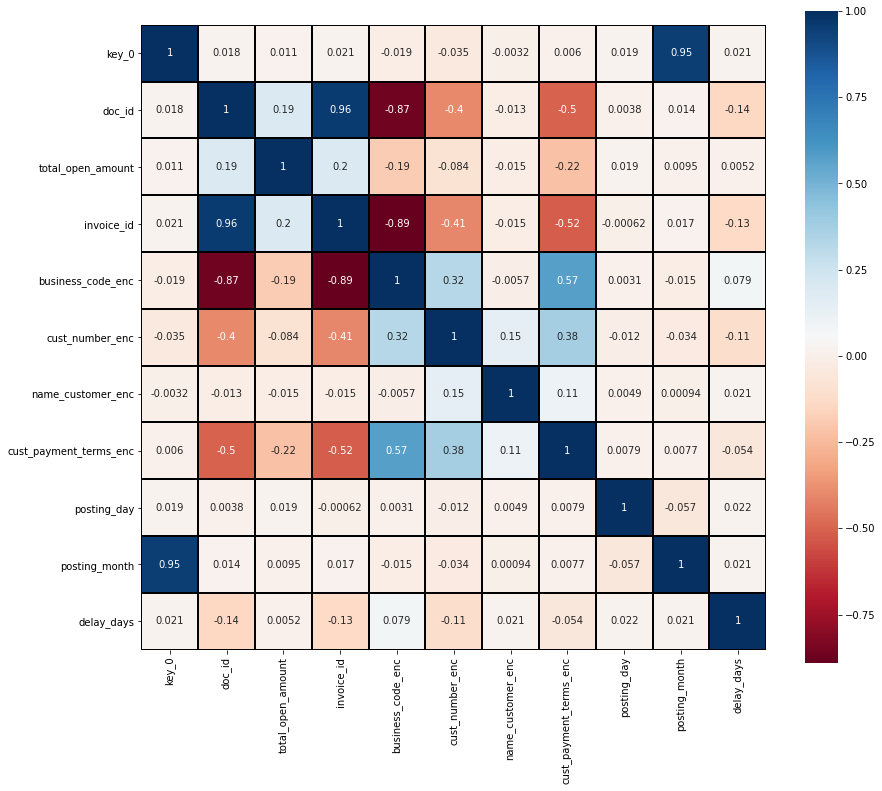

In [92]:
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))         
da=x_train.merge(y_train,on = x_train.index)
sns.heatmap(da.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='black', annot=True)

## SELECTING FEATURE USING EMBEDDED METHOD

In [93]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(8).plot(kind='barh')  
    return final_df

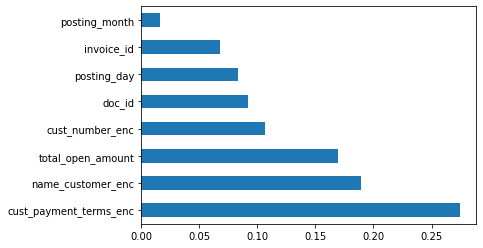

In [94]:
feature_importance=tree_based_feature_importance(x_train,y_train)       #top 8 important feature

In [95]:
feature_importance

,Features,Importances
6,cust_payment_terms_enc,0.274689
5,name_customer_enc,0.189162
1,total_open_amount,0.169577
4,cust_number_enc,0.106641
0,doc_id,0.091665
7,posting_day,0.083411
2,invoice_id,0.067457
8,posting_month,0.016136
3,business_code_enc,0.001262


In [96]:
#SELECTING THE IMPORTANT FEATURE 
selected_train=x_train[['cust_payment_terms_enc','name_customer_enc','total_open_amount','cust_number_enc','doc_id','invoice_id','business_code_enc']]#,'clear_day','clear_month'
selected_val=x_val[['cust_payment_terms_enc','name_customer_enc','total_open_amount','cust_number_enc','doc_id','invoice_id','business_code_enc']]
selected_test=x_test[['cust_payment_terms_enc','name_customer_enc','total_open_amount','cust_number_enc','doc_id','invoice_id','business_code_enc']]


# Experimenting on different models

In [97]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression

In [99]:
Algorithm.append('Linear Regression_val')
linearR = LinearRegression()
linearR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = linearR.predict(selected_val)

In [100]:
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))

In [101]:
Algorithm.append('Linear Regression_test')
linearR = LinearRegression()
linearR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = linearR.predict(selected_test)

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=False))
R2_Score.append(r2_score(y_test, predicted))

# Decision Tree Regressor

In [103]:
Algorithm.append('Decision Tree Regressor_val')
DecisionTR = DecisionTreeRegressor(random_state=0,max_depth=4) 
DecisionTR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = DecisionTR.predict(selected_val)

In [104]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))

In [105]:
Algorithm.append('Decision Tree Regressor_test')
DecisionTR = DecisionTreeRegressor(random_state=0,max_depth=4 )
DecisionTR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = DecisionTR.predict(selected_test)

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=False))
R2_Score.append(r2_score(y_test, predicted))

# Support Vector Regression

In [107]:
#Algorithm.append('Support Vector Regression')
Algorithm.append('Support Vector Regression_val')
clf = SVR()
clf.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(selected_val)

In [108]:
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))

In [109]:
Algorithm.append('Support Vector Regression_test')
clf = SVR()
clf.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(selected_test)

In [110]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=False))
R2_Score.append(r2_score(y_test, predicted))

# Random Forest Regressor

In [111]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor_val')
RandonFR = RandomForestRegressor()
RandonFR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = RandonFR.predict(selected_val)

In [112]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))

In [113]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor_test')
RandonFR = RandomForestRegressor()
RandonFR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = RandonFR.predict(selected_test)

In [114]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted,squared=False))
R2_Score.append(r2_score(y_test, predicted))

# XGB Regressor

In [115]:
import xgboost as xgb
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('XGB Regressor_val')
XGBR = xgb.XGBRegressor()
XGBR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = XGBR.predict(selected_val)

In [116]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))

In [117]:

# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('XGB Regressor_test')
XGBR = xgb.XGBRegressor()
XGBR.fit(selected_train, y_train)

# Predicting the Test Set Results
predicted = XGBR.predict(selected_test)

In [118]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted,squared=False))
R2_Score.append(r2_score(y_test, predicted))

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [119]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [120]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression_val,7.711944,-0.217746
1,Linear Regression_test,10.908954,-0.026570
2,Decision Tree Regressor_val,7.363843,-0.110294
3,Decision Tree Regressor_test,11.464300,-0.133751
4,Support Vector Regression_val,6.922584,0.018783
5,Support Vector Regression_test,10.619134,0.027251
6,Random Forest Regressor_val,11.600728,-1.755493
7,Random Forest Regressor_test,16.588125,-1.373652
8,XGB Regressor_val,9.335774,-0.784553
9,XGB Regressor_test,12.290767,-0.303108


# As we can see that Support Vector Regression is doing best for us among all these other regression model . So we will be using Support Vector Regression for prediction of our real_test

# Making the changes of real_test same as train set so that it can match the feature for prediction 

In [121]:
[col for col in real_test.columns if real_test[col].isnull().sum() > 0]  #Checking if there any NULL values 

['clear_date']

In [122]:
real_test.drop_duplicates(keep=False,inplace=True)    #dropping the duplicate value from real_test
real_test.shape 

(9368, 15)

In [123]:
TEST=real_test.drop(['clear_date'],axis=1)             # making another dataset TEST for prediction by removing clear_date from real_test


In [124]:
real_test=real_test.drop(['clear_date'],axis=1)             #dropping clear date from real_test

In [125]:
TEST

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0200769623,WAL-MAR systems,2020.0,1.930676e+09,2020-03-21,2020-03-21,2020-04-05,USD,16497.30,2020-03-21,NAH4,1.930676e+09,1
9,U001,0200920735,ALBERT trust,2020.0,1.930605e+09,2020-03-05,2020-03-05,2020-03-20,USD,136153.34,2020-03-05,NAA8,1.930605e+09,1
26,U001,0200723794,MID MO llc,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,124685.91,2020-02-27,NAA8,1.930576e+09,1
30,U001,0200726979,BJ'S,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,627.46,2020-02-27,NAA8,1.930572e+09,1
47,U001,0100021540,MASTER in,2020.0,1.930855e+09,2020-05-04,2020-05-04,2020-05-14,USD,2885.54,2020-05-04,NA10,1.930855e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,U001,0200769623,WAL-MAR foundation,2020.0,1.930613e+09,2020-03-06,2020-03-06,2020-03-21,USD,50972.52,2020-03-06,NAH4,1.930613e+09,1
49983,U001,0200769623,WAL-MAR us,2020.0,1.930620e+09,2020-03-07,2020-03-07,2020-03-22,USD,26842.88,2020-03-07,NAH4,1.930620e+09,1
49988,U001,0200152991,JET in,2020.0,1.930847e+09,2020-05-01,2020-05-01,2020-05-16,USD,7087.06,2020-05-01,NAA8,1.930847e+09,1
49989,U001,0200782669,SYGMA co,2020.0,1.930774e+09,2020-04-15,2020-04-15,2020-05-05,USD,11614.23,2020-04-15,NAD1,1.930774e+09,1


In [126]:
TEST.shape

(9368, 14)

In [127]:
TEST.drop_duplicates(keep=False,inplace=True)        # Dropping the duplicate values
TEST.shape 

(9368, 14)

In [128]:
TEST=TEST.drop(['isOpen','buisness_year'],axis=1)    # Dropping isOpen and buisness_year column

In [129]:
TEST['business_code'] = np.where(TEST['business_code'].isin(["U002",
                                                             "U005",    #Clubbing the business code column variables
                                                             "U007"]),"U013",TEST['business_code'])

In [130]:
TEST['business_code_enc'] = encoder.fit_transform(TEST['business_code'])   # label encoding on business_code

In [131]:
TEST=TEST.drop(['business_code'],axis=1)                                             # dropping business_code

In [132]:
TEST['cust_number_enc'] = encoder.fit_transform(TEST['cust_number'])     # label encoding on cust_number

In [133]:
TEST=TEST.drop(['cust_number'],axis=1)                                                 # dropping cust_number

In [134]:
TEST['name_customer_enc'] = encoder.fit_transform(TEST['name_customer'])  # label encoding on name_customer

In [135]:
TEST=TEST.drop(['name_customer'],axis=1)                                               # dropping name_customer

In [136]:
TEST['cust_payment_terms_enc'] = encoder.fit_transform(TEST['cust_payment_terms'])    # label encoding on cust_payment_terms


In [137]:
TEST=TEST.drop(['cust_payment_terms'],axis=1)                                        # dropping cust_payment_terms

In [138]:
TEST=TEST.drop(['invoice_currency'],axis=1)                                          # dropping invoice_currency

In [139]:
TEST['due_day'] = TEST['due_in_date'].dt.day
TEST['due_month'] = TEST['due_in_date'].dt.month                                      # extracting day and month from due_date

In [140]:
TEST=TEST.drop(['due_in_date'],axis=1)                                                # dropping due_in_date

In [141]:
TEST['posting_date']=pd.to_datetime(TEST['posting_date'])                           # extracting day and month from posting_date
TEST['posting_day'] = TEST['posting_date'].dt.day
TEST['posting_month'] = TEST['posting_date'].dt.month


In [142]:
TEST=TEST.drop(['posting_date'],axis=1)                                            # dropping posting_date

In [143]:
TEST=TEST.drop(['baseline_create_date','document_create_date.1'],axis=1)           # dropping baseline_create_date and document_create.1

## Checking and selecting the faetures from TEST same as x_train 

In [144]:
TEST.columns                                                  #checking columns of TEST

Index(['doc_id', 'total_open_amount', 'invoice_id', 'business_code_enc',
       'cust_number_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'due_day', 'due_month', 'posting_day', 'posting_month'],
      dtype='object')

In [145]:
x_train.columns                                              # checking columns of x_train

Index(['doc_id', 'total_open_amount', 'invoice_id', 'business_code_enc',
       'cust_number_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'posting_day', 'posting_month'],
      dtype='object')

In [146]:
# selecting feature from TEST
selected_TEST=TEST[['cust_payment_terms_enc','name_customer_enc','total_open_amount','cust_number_enc','doc_id','invoice_id','business_code_enc']]

# Predicting delay_days on the TEST  using Support Vector Regression

In [147]:
final_result = clf.predict(selected_TEST)    #predicting on selected_TEST

In [148]:
final_result = pd.Series(final_result,name='delay')      #converting final_result into series


In [149]:
final_result

0      -0.103516
1      -0.103189
2      -0.103056
3      -0.103034
4      -0.104353
          ...   
9363   -0.103224
9364   -0.103259
9365   -0.104312
9366   -0.103973
9367   -0.103741
Name: delay, Length: 9368, dtype: float64

In [150]:
final_result.isnull().sum()       #checking for the null values

0

In [151]:
real_test.reset_index(drop=True,inplace=True)   #reseting the index of real_test


In [152]:
real_test['delay_days']=final_result            #appending the predicted result in real_test in column delay day

In [153]:
[col for col in real_test.columns if real_test[col].isnull().sum() > 0]  #Checking if there any NULL values 

[]

In [154]:
real_test.head()   #checking the dataset

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,U001,0200769623,WAL-MAR systems,2020.0,1.930676e+09,2020-03-21,2020-03-21,2020-04-05,USD,16497.30,2020-03-21,NAH4,1.930676e+09,1,-0.103516
1,U001,0200920735,ALBERT trust,2020.0,1.930605e+09,2020-03-05,2020-03-05,2020-03-20,USD,136153.34,2020-03-05,NAA8,1.930605e+09,1,-0.103189
2,U001,0200723794,MID MO llc,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,124685.91,2020-02-27,NAA8,1.930576e+09,1,-0.103056
3,U001,0200726979,BJ'S,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,627.46,2020-02-27,NAA8,1.930572e+09,1,-0.103034
4,U001,0100021540,MASTER in,2020.0,1.930855e+09,2020-05-04,2020-05-04,2020-05-14,USD,2885.54,2020-05-04,NA10,1.930855e+09,1,-0.104353


In [155]:
# Function to make buckets of the delay_days
def delay_buckets(x):
    if (x < 16): return '0-15'
    elif (x>15 or x<31): return '15-30' 
    elif (x>30 or x<46): return '30-45'  
    else: return '45+'

In [156]:
# Appending the buckets of delay_days in real_test in column delay_bucket
real_test['delay_bucket'] = real_test.delay_days.apply(delay_buckets)

In [157]:
# Making the new column Payment_day_predicted (that is = due_date + delay_days)
import datetime
real_test['due_in_date'] = pd.to_datetime(real_test['due_in_date'])
real_test['delay_days'] = pd.to_timedelta(real_test['delay_days'],'d')
real_test['Payment_day_predicted'] = real_test['due_in_date'] + real_test['delay_days']

In [158]:
real_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days,delay_bucket,Payment_day_predicted
0,U001,0200769623,WAL-MAR systems,2020.0,1.930676e+09,2020-03-21,2020-03-21,2020-04-05,USD,16497.30,2020-03-21,NAH4,1.930676e+09,1,-1 days +21:30:56.184681600,0-15,2020-04-04 21:30:56.184681600
1,U001,0200920735,ALBERT trust,2020.0,1.930605e+09,2020-03-05,2020-03-05,2020-03-20,USD,136153.34,2020-03-05,NAA8,1.930605e+09,1,-1 days +21:31:24.441456,0-15,2020-03-19 21:31:24.441456000
2,U001,0200723794,MID MO llc,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,124685.91,2020-02-27,NAA8,1.930576e+09,1,-1 days +21:31:35.979916800,0-15,2020-03-12 21:31:35.979916800
3,U001,0200726979,BJ'S,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,627.46,2020-02-27,NAA8,1.930572e+09,1,-1 days +21:31:37.881235200,0-15,2020-03-12 21:31:37.881235200
4,U001,0100021540,MASTER in,2020.0,1.930855e+09,2020-05-04,2020-05-04,2020-05-14,USD,2885.54,2020-05-04,NA10,1.930855e+09,1,-1 days +21:29:43.916611200,0-15,2020-05-13 21:29:43.916611200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,U001,0200769623,WAL-MAR foundation,2020.0,1.930613e+09,2020-03-06,2020-03-06,2020-03-21,USD,50972.52,2020-03-06,NAH4,1.930613e+09,1,-1 days +21:31:21.415123200,0-15,2020-03-20 21:31:21.415123200
9364,U001,0200769623,WAL-MAR us,2020.0,1.930620e+09,2020-03-07,2020-03-07,2020-03-22,USD,26842.88,2020-03-07,NAH4,1.930620e+09,1,-1 days +21:31:18.456441600,0-15,2020-03-21 21:31:18.456441600
9365,U001,0200152991,JET in,2020.0,1.930847e+09,2020-05-01,2020-05-01,2020-05-16,USD,7087.06,2020-05-01,NAA8,1.930847e+09,1,-1 days +21:29:47.445187200,0-15,2020-05-15 21:29:47.445187200
9366,U001,0200782669,SYGMA co,2020.0,1.930774e+09,2020-04-15,2020-04-15,2020-05-05,USD,11614.23,2020-04-15,NAD1,1.930774e+09,1,-1 days +21:30:16.755609600,0-15,2020-05-04 21:30:16.755609600


In [159]:
real_test.head()   # checking the head of dataset


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days,delay_bucket,Payment_day_predicted
0,U001,0200769623,WAL-MAR systems,2020.0,1.930676e+09,2020-03-21,2020-03-21,2020-04-05,USD,16497.30,2020-03-21,NAH4,1.930676e+09,1,-1 days +21:30:56.184681600,0-15,2020-04-04 21:30:56.184681600
1,U001,0200920735,ALBERT trust,2020.0,1.930605e+09,2020-03-05,2020-03-05,2020-03-20,USD,136153.34,2020-03-05,NAA8,1.930605e+09,1,-1 days +21:31:24.441456,0-15,2020-03-19 21:31:24.441456000
2,U001,0200723794,MID MO llc,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,124685.91,2020-02-27,NAA8,1.930576e+09,1,-1 days +21:31:35.979916800,0-15,2020-03-12 21:31:35.979916800
3,U001,0200726979,BJ'S,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,627.46,2020-02-27,NAA8,1.930572e+09,1,-1 days +21:31:37.881235200,0-15,2020-03-12 21:31:37.881235200
4,U001,0100021540,MASTER in,2020.0,1.930855e+09,2020-05-04,2020-05-04,2020-05-14,USD,2885.54,2020-05-04,NA10,1.930855e+09,1,-1 days +21:29:43.916611200,0-15,2020-05-13 21:29:43.916611200


In [160]:
real_test[['due_in_date','Payment_day_predicted']]  #checking the predicted payment date with due_date

,due_in_date,Payment_day_predicted
0,2020-04-05,2020-04-04 21:30:56.184681600
1,2020-03-20,2020-03-19 21:31:24.441456000
2,2020-03-13,2020-03-12 21:31:35.979916800
3,2020-03-13,2020-03-12 21:31:37.881235200
4,2020-05-14,2020-05-13 21:29:43.916611200
...,...,...
9363,2020-03-21,2020-03-20 21:31:21.415123200
9364,2020-03-22,2020-03-21 21:31:18.456441600
9365,2020-05-16,2020-05-15 21:29:47.445187200
9366,2020-05-05,2020-05-04 21:30:16.755609600


# Making the final dataset with Payment_day_predicted

In [161]:
FINAL_DATA=real_test[['cust_number','name_customer','invoice_id','due_in_date','delay_days','delay_bucket','Payment_day_predicted']]

In [162]:
FINAL_DATA.head()

,cust_number,name_customer,invoice_id,due_in_date,delay_days,delay_bucket,Payment_day_predicted
0,0200769623,WAL-MAR systems,1.930676e+09,2020-04-05,-1 days +21:30:56.184681600,0-15,2020-04-04 21:30:56.184681600
1,0200920735,ALBERT trust,1.930605e+09,2020-03-20,-1 days +21:31:24.441456,0-15,2020-03-19 21:31:24.441456000
2,0200723794,MID MO llc,1.930576e+09,2020-03-13,-1 days +21:31:35.979916800,0-15,2020-03-12 21:31:35.979916800
3,0200726979,BJ'S,1.930572e+09,2020-03-13,-1 days +21:31:37.881235200,0-15,2020-03-12 21:31:37.881235200
4,0100021540,MASTER in,1.930855e+09,2020-05-14,-1 days +21:29:43.916611200,0-15,2020-05-13 21:29:43.916611200


In [163]:
invoice_list=real_test[['name_customer','cust_number','invoice_id','total_open_amount','due_in_date','Payment_day_predicted','delay_bucket']]

In [164]:
invoice_list.head()

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,Payment_day_predicted,delay_bucket
0,WAL-MAR systems,0200769623,1.930676e+09,16497.30,2020-04-05,2020-04-04 21:30:56.184681600,0-15
1,ALBERT trust,0200920735,1.930605e+09,136153.34,2020-03-20,2020-03-19 21:31:24.441456000,0-15
2,MID MO llc,0200723794,1.930576e+09,124685.91,2020-03-13,2020-03-12 21:31:35.979916800,0-15
3,BJ'S,0200726979,1.930572e+09,627.46,2020-03-13,2020-03-12 21:31:37.881235200,0-15
4,MASTER in,0100021540,1.930855e+09,2885.54,2020-05-14,2020-05-13 21:29:43.916611200,0-15


In [165]:
invoice_list['Payment_day_predicted'] = pd.to_datetime(invoice_list['Payment_day_predicted']).dt.date

In [166]:
invoice_list.head()

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,Payment_day_predicted,delay_bucket
0,WAL-MAR systems,0200769623,1.930676e+09,16497.30,2020-04-05,2020-04-04,0-15
1,ALBERT trust,0200920735,1.930605e+09,136153.34,2020-03-20,2020-03-19,0-15
2,MID MO llc,0200723794,1.930576e+09,124685.91,2020-03-13,2020-03-12,0-15
3,BJ'S,0200726979,1.930572e+09,627.46,2020-03-13,2020-03-12,0-15
4,MASTER in,0100021540,1.930855e+09,2885.54,2020-05-14,2020-05-13,0-15


In [167]:
#invoice_list.to_csv("DBdata.csv",index=False)

In [168]:
groups = invoice_list.groupby('cust_number')

In [169]:
groups.head()


,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,Payment_day_predicted,delay_bucket
0,WAL-MAR systems,0200769623,1.930676e+09,16497.30,2020-04-05,2020-04-04,0-15
1,ALBERT trust,0200920735,1.930605e+09,136153.34,2020-03-20,2020-03-19,0-15
2,MID MO llc,0200723794,1.930576e+09,124685.91,2020-03-13,2020-03-12,0-15
3,BJ'S,0200726979,1.930572e+09,627.46,2020-03-13,2020-03-12,0-15
4,MASTER in,0100021540,1.930855e+09,2885.54,2020-05-14,2020-05-13,0-15
...,...,...,...,...,...,...,...
9277,MAINES systems,200765011,1.930915e+09,16099.20,2020-06-02,2020-06-01,0-15
9289,IND,0100011958,1.991840e+09,26639.20,2020-05-11,2020-05-10,0-15
9299,CO corp,200561861,1.930647e+09,30906.69,2020-04-03,2020-04-02,0-15
9352,PJ,0100046480,1.991842e+09,13901.00,2020-04-24,2020-04-23,0-15
